In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [33]:
iris_data = pd.read_csv('Iris.csv')
iris_data = iris_data.drop(columns=['Id'])

In [34]:
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [35]:
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

In [39]:
print("KNN Accuracy:", accuracy_knn)
print("\nKNN Classification Report:\n", classification_rep_knn)

KNN Accuracy: 1.0

KNN Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [40]:
X_vis = X_train.iloc[:, :2].values  
y_vis = y_train

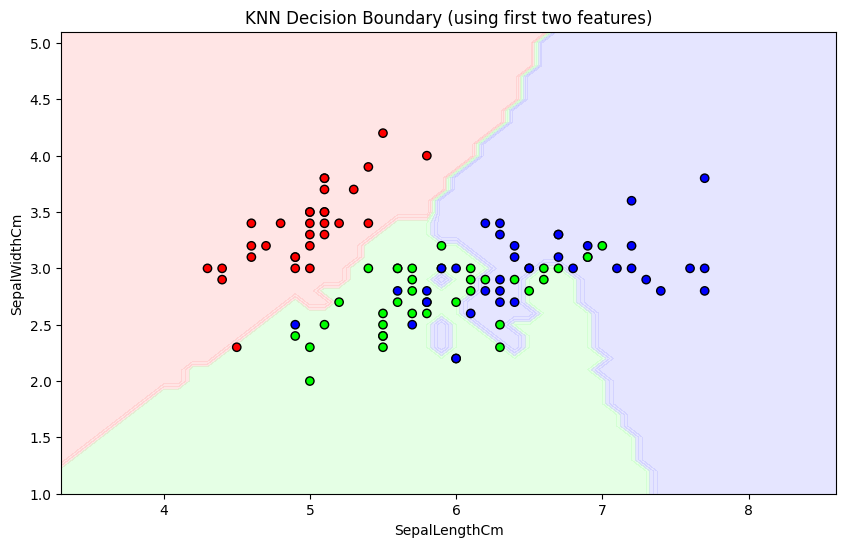

In [41]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("KNN Decision Boundary (using first two features)")
plt.show()

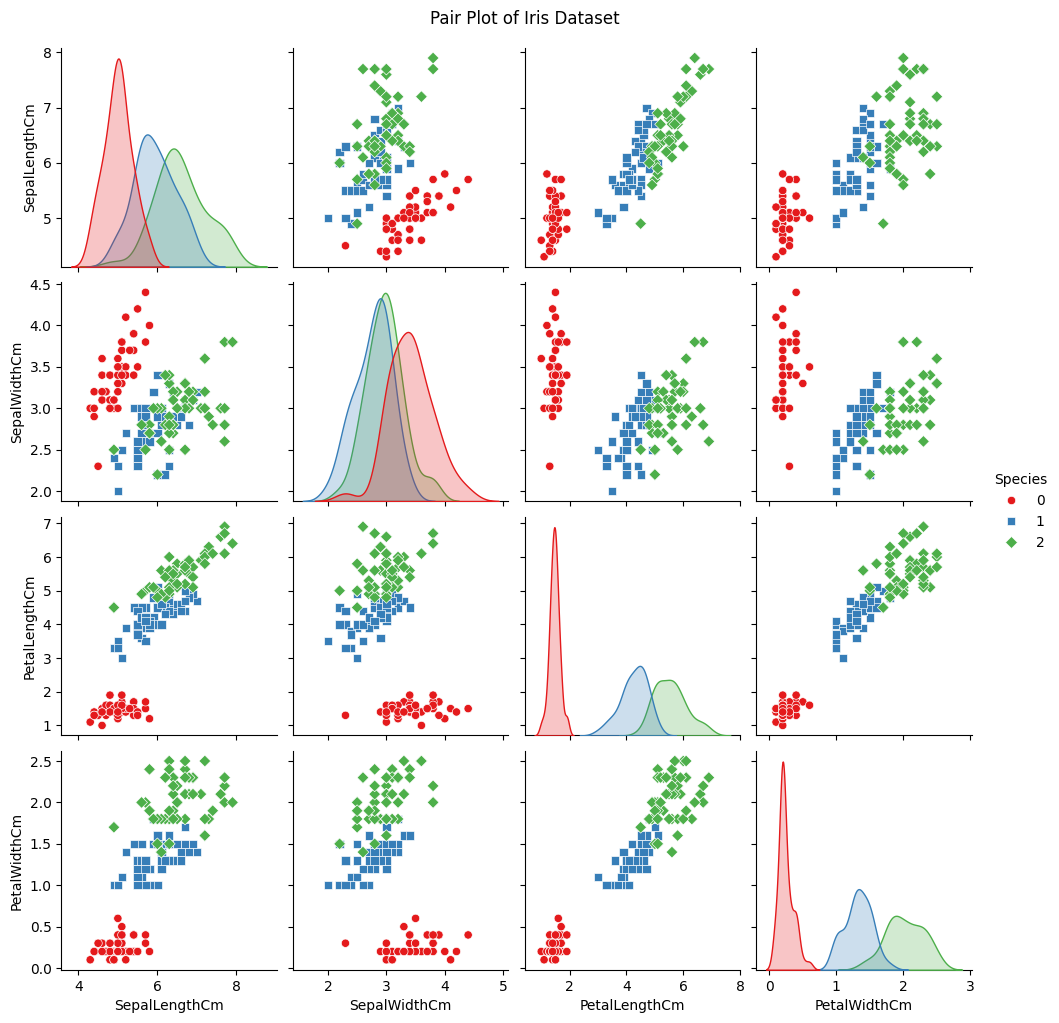

In [ ]:
sns.pairplot(iris_data, hue="Species", markers=["o", "s", "D"], palette="Set1")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)  # Adjust title position for clarity
plt.show()